# Integradores de Python

En el notebook anterior implementamos tres integradores, pero en la actualidad casi todos los lenguajes de programación tiene implementados algunos integradores. En este notebook revisaremos uno de los integradores que ya están códificados en Python, por ejemplo `quad`, `dblquad` y `tplquad` además de contar con integradores de sistemas de ODE, por ejemplo `ode` y `odeint` 

In [1]:
from pylab import * # se importa la libreria pylab
from scipy.integrate import * # se importa la libreria scipy.integrate
from numpy import * # se importa numpy
%matplotlib inline

* ¿Qué paquetes tiene la librería `scipy` ?
   
   Una extensa lista de métodos. Estos métodos abarcan: álgebra lineal, optimización, integración, interpolación, tratamiento de señales y transformada rápida de Fourier.
* En particular `scipy.integrate`
       
       Integración numérica dada una muestra fija:
        Regla del trapecio:  trapz(y[, x, dx, axis]) 
        Regla del trapecio (cummulative): cumtrapz(y[, x, dx, axis, initial])
        Regla de Simpson: simps(y[, x, dx, axis, even])
        Integración de Romberg: romb(y[, dx, axis, show])
        
       
        Integración de funciones dado el objeto función
         quad(func, a, b[, args, full_output, ...])
         dblquad(func, a, b, gfun, hfun[, args, ...])
         tplquad(func, a, b, gfun, hfun, qfun, rfun)
         nquad(func, ranges[, args, opts, full_output])
         fixed_quad(func, a, b[, args, n])
         quadrature(func, a, b[, args, tol, rtol, ...])
         romberg(function, a, b[, args, tol, rtol, ...])
         quad_explain([output])
         newton_cotes(rn[, equal])
         
         Problemas de ecuaciones diferenciales
           solve_ivp(fun, t_span, y0[, method, t_eval, ...])	Resolver un PVI para un sistema de EDO
           Solve an initial value problem for a system of ODEs.
           RK23(fun, t0, y0, t_bound[, max_step, rtol, ...])	RKT para orden 3(2).
           RK45(fun, t0, y0, t_bound[, max_step, rtol, ...])	RKT para orden 5(4).
           OdeSolver(fun, t0, y0, t_bound, vectorized)	Clase base para soluciones de EDO.
           DenseOutput(t_old, t)	Clase base para función lambda
           OdeSolution(ts, interpolants)	Solución continua de EDO.
         
         odeint(func, y0, t[, args, Dfun, col_deriv, ...])	Integrar un sistema de EDO.
         ode(f[, jac])	Una interfaz genérica de clase para integradores numéricos
         complex_ode(f[, jac])	Ecuaciones diferenciales para sistemas complejos.
         
         

## `quad` 

In [2]:
import scipy.integrate

In [3]:
scipy.integrate?

In [4]:
quad?

Comenzaremos por el primer integrador que se aparece en la documentación de `numpy`, es decir `quad` para ello integremos la siguiente función: $f(x) = \alpha x^2 + \beta$, de $a$ a $b$,es decir, $\displaystyle \int_{a} ^{b} \alpha x^2 + \beta dx $ con $a = 0$ , $b=2$ y $\alpha = 1$ y $\beta = 3$

Definamos $f(x) = \alpha x^2 + \beta$

In [5]:
def f(x,a,b):
    return a*x**2 + b

In [6]:
f(2,1,3)

7

Ahora integremos dicha función con los límites ya mencionados 

In [7]:
quad(f, 0.0, 2.0, (1.0, 3.0,))

(8.666666666666668, 9.621932880084691e-14)

* ¿Qué es la salida del integrador?
        Primera salida: solución de la ecuación con límite superior e inferior
* ¿Cuál es la solución analítica de dicha integral?
$$\ \int_{0} ^{2} \ x^2 + 3 dx $$ luego
$$\ \int \ x^2  dx  + \int \ 3  dx =  \frac{x^3}{3} +3x +C $$
ahora, evaluando en los límites (0,2)
$$\ \frac{2^3}{3} +3(2) = \frac{8}{3}+6 = 8.666$$
* ¿El resultado es correcto?
 
 Es un resultado aproximado, pues un método numérico siempre tiene error, aunque sea muy pequeño, en este caso es 9.621932880084691e-14 y por lo tanto no significativo


        

###### 26.0/3.0

Ahora integraremos una gaussiana de menos infinito  a infinito, es decir:
$$\displaystyle \int_{-\infty} ^{\infty} \exp(-x^2) dx $$


* Escriba la solución analítica de dicha integral
    $$\  \int_{-\infty} ^{\infty} \exp(-x^2) dx  = \sqrt{ \pi } $$

In [8]:
### Definimos la gaussiana
def g(x):
    return exp(-x**2)

In [9]:
### Integramos dicha función
quad(g, -inf, inf)

(1.7724538509055159, 1.4202636780944923e-08)

* ¿El resultado es correcto?
    Sí, porque este número es próximo a $\sqrt{ \pi }$ y el error es 1.4202636780944923e-08
* grafique la siguiente función $${\displaystyle f(x, \mu ,\sigma ^{2}, \alpha)=\alpha \exp \left({-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}\right)} $$ para distintos valores de $\alpha > 0$, $\mu$ y $\sigma > -1$

* ¿Quá pasa si $\alpha =\dfrac{1}{\sigma \sqrt{2\pi}}$? Se normaliza la campana

* Integre dicha función de manera analítica y numericamente con `quad` de menos infinito a infinito
  El siguiente código se corre al final de la sección 
  
  quad(campana, -inf, inf, (0, 1,0.2820947918)
  
  Y se observa que el error es nanométrico 


In [10]:
def campana(x,m,s,a):
    return a*exp((-(x-m)**2)/(2*s**2))

In [11]:
campana(0.1,-0.5,0.8,10)

7.5483960198900739

In [12]:
x = linspace (-5.0, 5.0, 101 )

In [13]:
sol = campana(x,0,0.8,1)

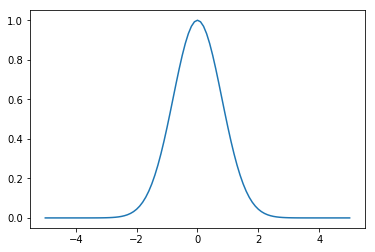

In [14]:
plot(x,sol)

In [15]:
asol = campana(x,0,2,0.2820947918) #a la calculamos externamente con la fórmula#

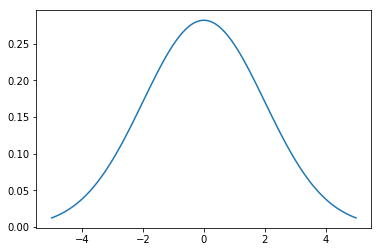

In [16]:
plot(x,asol)

In [17]:
### Integramos dicha función
quad(campana, -inf, inf, (0, 1,0.2820947918))

(0.7071067812520251, 7.197068186423974e-09)

## `dblquad` 

Consulte la documentación de `dblquad` e integre de numericamente y analiticamenta los siguiente:

* Vemos que en la documentación se integra $\displaystyle \int_{0}^{1/2} \displaystyle \int_{0}^{1-2y} xy\,dy\,dx = \dfrac{1}{96}$
* $ \displaystyle \int_{-1}^{1} \displaystyle \int_{0}^{1} x^2 + y^2 \,dx \,dy$ 
* $\displaystyle \int_{0}^{1} \displaystyle \int_{0}^{\sqrt{1-x^2}} \sqrt{1-y^2}\,dy\,dx$


La primera solución analítica

$$ \int_{-1}^{1} \displaystyle \int_{0}^{1} x^2 + y^2 \,dx \,dy =\frac{4}{3} $$
La segunda solución analítica
$$\displaystyle \int_{0}^{1} \displaystyle \int_{0}^{\sqrt{1-x^2}} \sqrt{1-y^2}\,dy\,dx = \frac{2}{3}$$
 

In [18]:
dblquad(lambda x,y: x**2+y**2, 1, -1, lambda x: 1, lambda x: 0)

(1.3333333333333333, 1.4802973661668752e-14)

In [19]:
dblquad(lambda x, y: sqrt(1-y**2), 0, 1, lambda x: 0, lambda x: sqrt(1-x**2))

(0.6666666666666666, 1.110217789858929e-14)

In [20]:
1.0/96

0.010416666666666666

* Investigue que es `lambda`
  
  Define funciones anónimas. Python permite la creación de funciones anónimas (por ejemplo funciones que no están ligadas a un nombre) a la hora de correr, usando una construcción llamada lambda. Esta lambda no es exactamente la misma lambda que existe en los lenguajes funcionales de programación, entonces es un concepto muy poderoso que está integrado a Python y es frecuentemente usado en conjunción con conceptos típicos de la programación funcional como filter(), map() y reduce().

## `tplquad` 

Realice lo mismo para`tplquad` e integre de numericamente y analiticamenta las siguientes:

* $ \displaystyle \int_{0}^{1/3} \displaystyle \int_{-1/2}^{0} \displaystyle \int_{0}^{1} (x + 2y + 3z)^2 \,dx \,dy\,dz$ 
* $ \displaystyle \int_{-1}^{1} \displaystyle \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \displaystyle \int_{-\sqrt{1-x^2-y^2}}^{\sqrt{1-x^2-y^2}}  \,dx \,dy\,dz$ 

La solución analítica de esta ecuación es
$$ \displaystyle \int_{0}^{1/3} \displaystyle \int_{-1/2}^{0} \displaystyle \int_{0}^{1} (x + 2y + 3z)^2 \,dx \,dy\,dz = \frac{1}{12}= 0.0833333$$
De la ecuación se puede ver claramente que esto es una esfera de radio = 1 centrado en el origen, por lo tanto
$$\  \int_{-1}^{1} \displaystyle \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \displaystyle \int_{-\sqrt{1-x^2-y^2}}^{\sqrt{1-x^2-y^2}}  \,dx \,dy\,dz = \frac{4}{3}\pi r^2 = \frac{4}{3}\pi $$

In [21]:
def uno(x,y,z):
    return (x+2*y+3*z)**2

In [22]:
tplquad(uno, 0, 1/3, lambda z:-1/2, lambda z:0, lambda z,x:0, lambda z,x:1)

(0.08333333333333333, 2.576076777054118e-14)

In [23]:
def dos(x,y,z):
    return 1.0

In [24]:
def tres(x):
    return sqrt(1-x**2)

In [25]:
def tresa(x):
    return -sqrt(1-x**2)

In [26]:
def cuatro(x,y):
    return sqrt(1-x**2-y**2)


In [27]:
def cuatroa(x,y):
    return -sqrt(1-x**2-y**2)


In [28]:
tplquad(dos, -1.0, 1.0, lambda x:-sqrt(1-x**2), lambda x:sqrt(1-x**2), lambda x,y: -sqrt(1-x**2-y**2), lambda x,y: sqrt(1-x**2-y**2))

(4.188790204786397, 2.000470900043183e-09)

In [29]:
sol = tplquad(dos, -1.0, 1.0, tresa, tres, cuatroa, cuatro)

In [30]:
(4/3)*pi

4.1887902047863905

In [31]:
sol

(4.188790204786397, 2.000470900043183e-09)

## Ode

En `scipy` tenemos dos integradores de ODE, `ode` y `odeint`

* Consulte la documentación de cada uno de estos integradores

In [32]:
??odeint

Comenzaremos por integrar el oscilador armónico, definamos la función `oscilador`

In [33]:
def oscilador(x, t, para):
    return array((x[1],-(para**2)*(x[0]) ))

Integremos el oscilador con `ode`

In [34]:
t = linspace(0,100,1001)

In [35]:
t

array([   0. ,    0.1,    0.2, ...,   99.8,   99.9,  100. ])

In [36]:
xout = odeint(oscilador, [1.0, 0.0], t, args=(1.0,))

* ¿Cuál es la salida de `odeint`?
    Un valor cercano a la solución y el error asociado al método

In [37]:
xout

array([[ 1.        ,  0.        ],
       [ 0.99500417, -0.0998334 ],
       [ 0.98006658, -0.19866932],
       ..., 
       [ 0.74453125,  0.66758994],
       [ 0.80745948,  0.58992567],
       [ 0.86231984,  0.50636706]])

In [38]:
type(xout)

numpy.ndarray

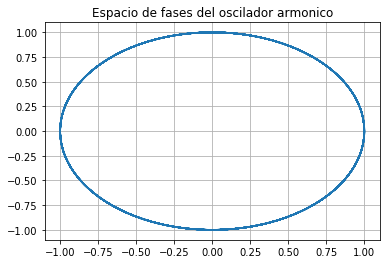

In [39]:
plot(xout[:,0], xout[:,1],)
title("Espacio de fases del oscilador armonico")
grid(True)

Text(0.5,1,'Posicion en funcion del tiempo')

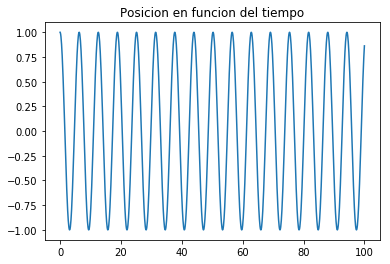

In [40]:
plot(t, xout[:,0])
title("Posicion en funcion del tiempo")

Grafiquemos la enegía como función del tiempo

Text(0.5,1,'Enegia como funcion del tiempo')

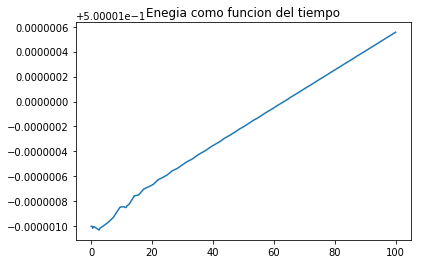

In [41]:
def energia(x):
    return 0.5*x[:,1]**2 + 0.5*x[:,0]**2 

e=energia(xout)
plot(t,e)
title("Enegia como funcion del tiempo")

Importemos nuestro archivo `integradores.py` el cual es un script que contiene nuestros funciones `metodo_euler` y `rg4` que son los integradores del notebook anterior

In [42]:
import integradores as myint

#### Integremos el oscilador armónico con el método de Euler

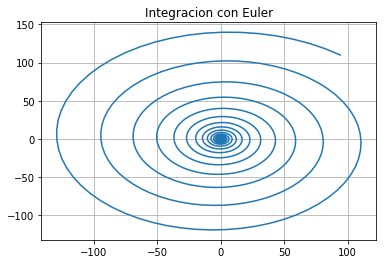

In [43]:
time, oute, = myint.metodo_euler(oscilador, 0.0, 100, [1.0, 0.0], 0.1, 1.0)

xe = []
ve = []
for i in oute:
    xe.append(i[0])
    ve.append(i[1])

plot(xe, ve)
title("Integracion con Euler")
grid(True)

#### Integremos el oscilador armónico con el método de Runge-Kutta

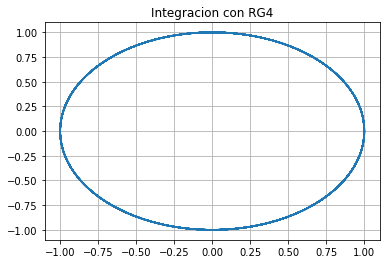

In [44]:
time, out, = myint.rg4(oscilador, 0.0, 100, [1.0, 0.0], 0.1, 1.0)

xr = []
vr = []
for i in out:
    xr.append(i[0])
    vr.append(i[1])

plot(xr, vr)
title("Integracion con RG4")
grid(True)

Ahora grafiquemos la energia como funcion del tiempo de cada uno de los integradores

In [45]:
### DEfinimos una función que calcule la energía para nuestros integradores
def energiaee(x,v):
    i=0
    suma = []
    while i < len(x):
        suma.append(0.5*x[i]**2 + 0.5*v[i]**2)
        i +=1
    return suma

In [46]:
er = energiaee(xr, vr) 
ee = energiaee(xe, ve)

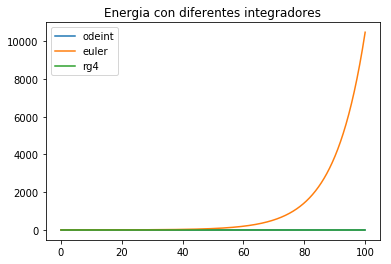

In [47]:
plot(t, e, label='odeint')
plot(time, ee, label='euler')
plot(time, er, label='rg4')
title("Energia con diferentes integradores")
legend()

Ahora integremos el péndulo 

\begin{equation}
 \dfrac{d^2 x(t)}{d t^2} + \dfrac{g}{\ell} \sin(x(t)) = 0
\end{equation}

Cuyo campo vectorial es:

\begin{eqnarray}
v = \dot{x} \\
\dot{v} = -\omega ^2\sin(x)
\end{eqnarray}

In [48]:
array([9,0])

array([9, 0])

In [49]:
def pendulo(x,t,para):
    return array((x[1],-(para**2)*(sin(x[0])) ))

In [50]:
t=linspace(0,10,101)
xpout = odeint(pendulo, [pi/2, 1.0], t, args=(1.0,))

Text(0.5,1,'Espacio fase el pendulo simple')

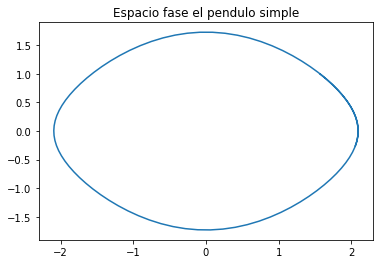

In [51]:
plot(xpout[:,0], xpout[:,1])
title("Espacio fase el pendulo simple")

Text(0.5,1,'Posicion en funcion del tiempo')

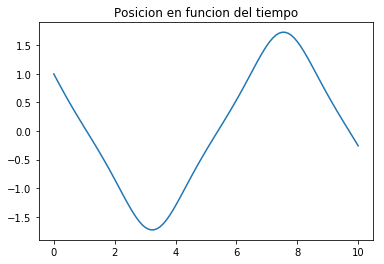

In [52]:
plot(t, xpout[:,1])
title("Posicion en funcion del tiempo")

In [53]:
def energiapen(x):
    return 0.5*x[:,1]**2 - (cos(x[:,0])) 

In [54]:
ep = energiapen(xpout)

Text(0.5,1,'Energia como funcion del tiempo')

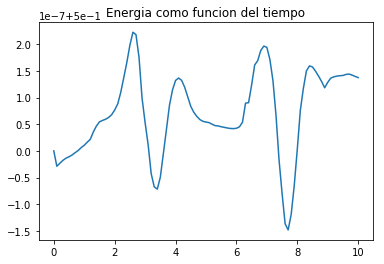

In [55]:
plot(t,ep)
title("Energia como funcion del tiempo")

In [56]:
### Generemos un número aleatorio entre -10 y -10
random.uniform(-10, 10)

-7.219179666284797

In [57]:
int(10*rand())

5

In [58]:
type(7)

int

Grafiquemos el péndulo simple para diferentes condiciones iniciales

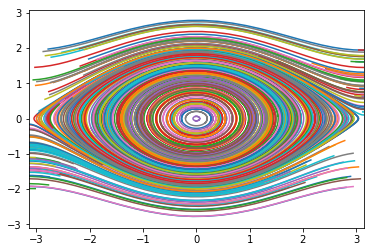

In [59]:
#primero el rango de iteraciones
for i in range(300):
    #posteriormente se generan numeros con el primer random van en el eje de las x y con el segundo en y
    x=[random.uniform(-pi, pi), random.uniform(-2, 2)]
    #aquí se hace la integración del péndulo con el integrador de EDO
    xpout = odeint(pendulo, x, t, args=(1.0,))
    #aquí se grafica
    plot(xpout[:,0], xpout[:,1])
    xlim(-pi,pi)

* ¿Cuál es la intepretación física de la gráfica anterior?
    aquí se puede ver la posición como función de la velocidad para múltiples condiciones iniciales en 
    un péndulo
* Comente el respectivo código

### Para el siguiente sistemas de ecuaciones utilice el integrador de Euler, Runge-Kutta y odeint. 

#### Considere el modelo de Lotka-Volterra:

\begin{eqnarray}
\dot{x} = 0.6x − 1.1xy \\
\dot{y} = xy − y
\end{eqnarray}

* Utilice odeint para encontrar la solución en el espacio fase para diferentes condiciones iniciales que representen la dinámica del sistema, es decir, encuentre soluciones en el plano xy.

* Cómo se ven las soluciones en el plano (t,x) y (t,y) para una condición inicial que haga varios ciclos. Explique sus resultados.

 Se observa una solución oscilante, pues con el tiempo disminuye tanto el número de presas como el de depredadores, pero después de un determinado tiempo vuelve a crecer, y así suscesivamente. Todo esto se puede apreciar también en el diagrama de fases. Esto tiene sentido porque hay puntos donde hay pocos depredadores y la población de presas tiende a crecer; cuando hay pocas presas, los depredadores menguan.

* Obtenga las mismas soluciones utilizando los integradores de Euler y Runge-Kutta. ¿Cuales son los valores del paso h para obtener los mismos resultados que en el inciso anterior?
  De lo observado al graficar, si se pudiera situar por efectividad (resultados más exactos con menos interaciones) yo lo pondría en el siguiente orden:
  
  Odeint: es el integrador que trae python para ecuaciones diferenciales, su error es pequeño y converge con relativamente pocas iteraciones y pasos de tamaño razonable (es decir, no necesitan un paso muy pequeño).
  
  Runge Kutta de 4 pasos: es un método que converge un poco más lento que odeint, pero a la vez es bastante poderoso, su tamaño de paso es apenas menor que el de odeint.
  
  Método de Euler: es un método muy poco efectivo, pues converge muy lentamente y su tamaño de paso debe ser mucho menor que el de odeint y Runge Kutta, sin embargo para tiempos pequeños puede funcionar pero hay que darle muchas iteraciones y esto es costoso en tiempos de cómputo.

#### Considere el oscilador armónico armotiguiado y amortiguado con forzamiento (vistos en el notebook anterior)

\begin{equation}
\dfrac{d^2 x(t)}{d t^2} + \beta \dfrac{d x(t)}{d t} + \omega_0 ^2 x(t)=0
\end{equation}

\begin{equation}
\dfrac{d^2 x(t)}{d t^2} + \beta \dfrac{d x(t)}{d t} + \omega_0 ^2 x(t) = F_0 \cos(\omega t)
\end{equation}

* Escriba un script `oscilador.py` con dichas funciones

Si definimos $\Delta = \beta ^2 - 4\omega_0 ^2 $
* Considere diferentes condiciones iniciales y valores para $\beta < 0$ y $ \omega_0$ tal que $\Delta >0 $, e integre con  Euler, Runge-Kutta y odeint
* Realice lo mismo para $\Delta < 0$
* Y $\Delta = 0 $
* Grafique las soluciones en el plano (t,x) y (t,v) para cada uno de los casos
* Grafique para cada caso el espacio de fases
* Y la energía para cado caso con los tres integradores
* Para el oscilador con amortiguado con forzamiento considere $F_0 = 1$ y $\omega$ un número aleatorio e integre con odeint y realice la graficas antes mencionadas
* ¿Qué pasa si $\omega_0 = \omega$?

Encontramos un fenómeno de resonancia, y es posible que se marque como error y el método numérico no funcione

In [60]:
#x(t) y y(t) son necesarios para visualizar el plano fase
def lotkav(x,t,a,b,c,d): #definimos la función que depende de las variables:
                        # x es x[0] y esto es presa y depredador como x[1] y esto es y
                        # t es el intervalo de tiempo
                        # a,b,c,d son los parámetros de esta ecuación
    dx_dt = x[0]*(a - b*x[1]) #ecuación diferencial de la presa
    dy_dt = x[1]*(-c + d*x[0]) #ecuación diferencial del depredador
    return np.array([dx_dt,dy_dt]) #guarda en un arreglo las ecuaciones descritas arriba
                                

In [61]:
#valor del parámetro que piden en el ejercicio
a = 0.6 # tasa de crecimiento de las presas (en ausencia de depredadores)
b = 1.1 #susceptibilidad de la presa a ser cazados
c = 1 #tasa de decrecimiento de depredadores (en ausencia de presas)
d = 1 #capacidad de depredación de los depredadores

x0 =10 #cantidad inicial de presas
y0 =10#cantidad inicial de depredadores
condin = np.array([x0,y0]) #un arreglo con las condiciones iniciales
t = linspace(0,160,2000) #(tiempo inicial, tiempo final, cantidad de puntos)
solucion = odeint(lotkav, condin, t, args=(a,b,c,d)) #odeint es el integrador, lotkav la función, condiciones inciales
                                                     #intervalo de tiempo y la entrada opcional de parámetros

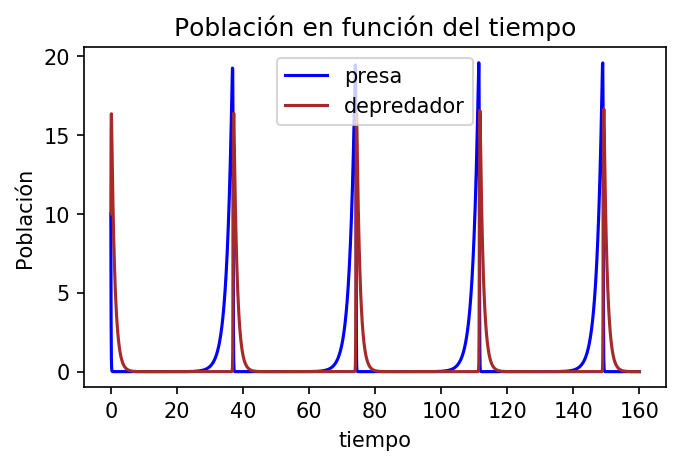

In [62]:
fig = figure(figsize=(5,3),dpi=150)
plot(t, solucion[:, 0], label='presa', color='blue') 
plot(t, solucion[:, 1], label='depredador', color='brown') 
xlabel("tiempo") 
ylabel(u"Población") 
title(u"Población en función del tiempo")
legend(loc = 'best') 
show()

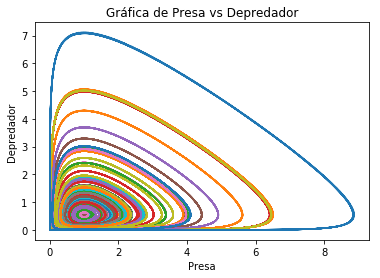

In [63]:
#Solución en plano fase para distintas condiciones iniciales 
for i in range(95): #número de condiciones inciales
    cond_in = np.array([rand(),rand()]) #condiciones aleatorias de presa y depredador
    solucion = odeint(lotkav, cond_in, t, args=(a,b,c,d))
    plot(solucion[:,0],solucion[:,1]) 
    title(u"Gráfica de Presa vs Depredador") 
    xlabel("Presa") 
    ylabel("Depredador") 
show()

In [64]:
def euler_(val_iniciales,tiempo,funcion): 
    h = tiempo[1] - tiempo[0]
    solucion = zeros( (len(tiempo),len(val_iniciales)) ) 
    solucion[0] = val_iniciales 
    for i in range(len(tiempo)-1):   
        solucion[i+1] = h*funcion(solucion[i],tiempo[i])+solucion[i] 
    return solucion

In [65]:
def alotkav(x,t): 
    d_x = 0.6*x[0] - 1.1*(x[0]*x[1]) 
    d_y = 1*(x[0]*x[1]) - 1*x[1] 
    return array([d_x,d_y]) 


x0 = 5 
y0 = 5 
c_i = array([x0,y0])

t = linspace(0,160,300000) 

asol = euler_(c_i,t,alotkav) 

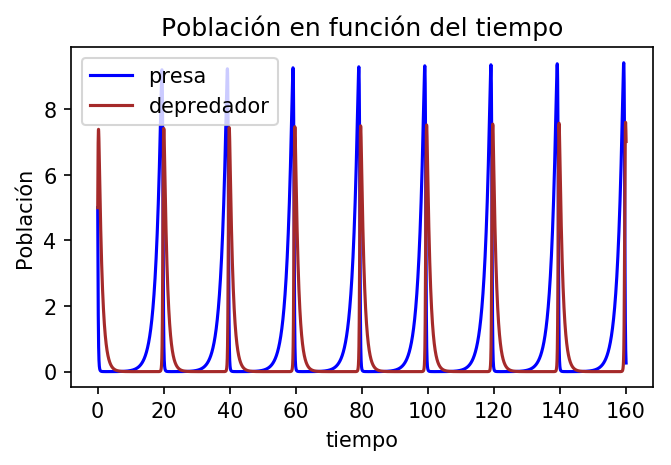

In [66]:
fig = figure(figsize=(5,3),dpi=150)
plot(t,asol[:,0], label="presa", color='blue')
plot(t,asol[:,1], label="depredador", color='brown')
xlabel("tiempo") #pido que imprima en el eje horizontal el texto "tiempo"
ylabel(u"Población") #pido que imprima en el eje vertical el texto "Población"
title(u"Población en función del tiempo")
legend(loc='best')
show()

In [67]:
def Runge(cond_ini,intervalo,funcion): 
    N = len(intervalo) 
    h = intervalo[1] - intervalo[0]
    sol = zeros( (N,len(cond_ini)) ) 
    sol[0] = cond_ini 
    for i in range(N-1): 
        k1 = funcion(intervalo[i],sol[i]) 
        k2 = funcion(intervalo[i] + 0.5*h,sol[i] + 0.5*h*k1)
        k3 = funcion(intervalo[i] + 0.5*h,sol[i] + 0.5*h*k2)
        k4 = funcion(intervalo[i] + h,sol[i] + h*k3)
        sol[i+1] = sol[i] + h*(1./6.)*(k1 + 2*k2 + 2*k3 + k4) 
    return sol

In [68]:
def blotkav(t,x): 
    d_x = 0.6*x[0] - 1.1*(x[0]*x[1]) 
    d_y = 1*(x[0]*x[1]) - 1*x[1] 
    return array([d_x,d_y]) 



x0 = 10 
y0 = 10 
c_i = [x0,y0]

t = linspace(0,150,2500) 

solucion = Runge(c_i,t,blotkav)


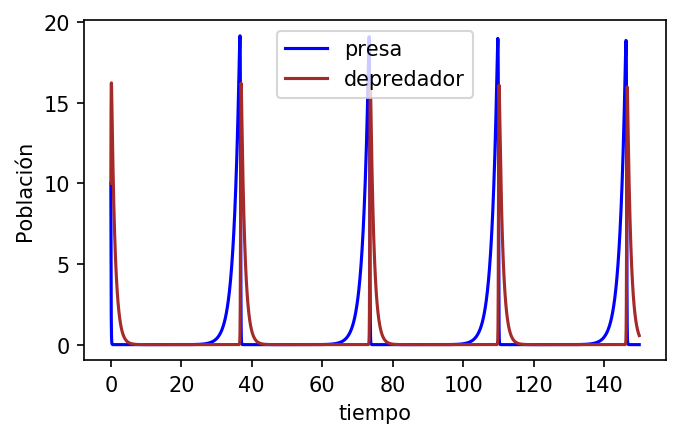

In [69]:
fig = figure(figsize=(5,3),dpi=150)
plot(t,solucion[:,0], label='presa', color='blue')
plot(t,solucion[:,1], label='depredador', color='brown')
xlabel("tiempo") 
ylabel(u"Población") 
legend(loc='best')
show()